<a href="https://colab.research.google.com/github/AaryaDesai1/Explainable_AI/blob/main/BERT_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590- XAI | Assignment #05

## Aarya Desai

# Table of Contents

>[Setting Up the Notebook](#scrollTo=NGxNTBb9TQap)

>>[Installing necessary libraries](#scrollTo=_Urp9YbLQ-1p)

>>[Importing the necessary libraries](#scrollTo=cl9wAWLtTH0X)

>>[Loading the data and model](#scrollTo=lZAwefn9UHFT)

>[Modelling](#scrollTo=X_qipgAtawQb)

>>[Tokenization](#scrollTo=i8SbgCuyVhW1)

>>[Train-Test split](#scrollTo=p8siCvqoWcfG)

>>[Defining and Running the Trainer](#scrollTo=FUHCigS3XaKO)

>[Predictions](#scrollTo=Yo_3gk0xa0L-)

>>[From the model](#scrollTo=BNysPt0VX042)

>>[Using SHAP](#scrollTo=1B8ZGgqSYH42)

>>[How to Interpret the following code chunks](#scrollTo=PKz1PVCYsksH)

>>>[shap.plots.text(shap_values[3])](#scrollTo=HajmNhnzsnMU)

>>>[shap.plots.bar(shap_values.abs.sum(0))](#scrollTo=PP53Y9_FsX8o)

>>>[shap.plots.bar(shap_values.abs.max(0))](#scrollTo=1FV5L6pMssT9)



# Setting Up the Notebook

## Installing necessary libraries
For this assignment, I need to install the following libraries:
- `transformers`: To use the BERT model which is provided by HuggingFace (i.e., the transformers library).
- `datasets`: To access a public dataset to use for this demo.
- `shap`: To use SHAP to further explain the results of the model.
- `torch`: To do computations.


In [ ]:
!pip install transformers datasets shap torch

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.7 MB/s eta 0:00:00


## Importing the necessary libraries

The following code cell imports all the libraries necessary for the steps after it. The comments within it give more information about what the imports mean.

In [ ]:
# For the model
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments

# For the data
from datasets import load_dataset
import torch

# For explainability
import shap

## Loading the data and model

**Data**: For this demo, I am using the iMDB dataset which is very commonly used for sentiment analysis use cases. It's a public dataset that consists of 25,000 movie reviews. The target or outcome variable is then a binary outcome variable that classifies the review as positive (1) or negative (0).

**Model**: The model I am using for the demo is the BERT model from HuggingFace. It is another very commonly used model for natural language processing use cases, specifically, for sentiment analysis tasks. There are many more, better, models that have come out since the release of BERT that work much better for sentiment analysis tasks and in different contexts. However, BERT is a well-known and widely used black-box model that would nicely demonstrate how well SHAP works in explaining its results.

- *Tokenizer*: In order to make the model work, we need to tokenize the transcripts to numeric representations. So, for the same, we also initialize a BERT tokenizer to convert all the scripts to tokens which can then be processed and computed by the model.

In [ ]:
# Load IMDb dataset
dataset = load_dataset("imdb")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
# Using GPUs:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Modelling


## Tokenization
As previously mentioned, the transcripts need to be converted to tokens so that the words can be processed as numbers instead. For the same, the following function helps in conducting this tokenization in an ordered way. It implements truncation to make sure that the transcripts aren't too long, and adds padding, a common NLP method to ensure consistency.

The dataset is then fully tokenized using the tokenizer and the tokenizing function.

In [ ]:
# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=128)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

## Train-Test split
The dataset is pre-split into a train and test set. However, to ensure that the notebook runs fast and well, I am taking a subset of these datasets. Here, I will be taking 1000 datapoints from the train set and 100 datapoints from the test set. These are shuffled using a random seed to ensure consistency in case the notebook needs to be run again.

In [ ]:
# Prepare train/test split
train_dataset = tokenized_datasets['train'].shuffle(seed=42).select(range(1000))  # Sample for speed
test_dataset = tokenized_datasets['test'].shuffle(seed=42).select(range(100))

## Defining and Running the Trainer
The next step is to define the trainer for the BERT model which passes arguments to the model to follow, e.g., batch size and number of epochs. Here, I am using the base training arguments, and not doing any hyperparameter tuning for ease of understanding.

In [ ]:
# Define trainer
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    logging_dir='./logs'
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.390395


TrainOutput(global_step=63, training_loss=0.5805696154397632, metrics={'train_runtime': 32.5096, 'train_samples_per_second': 30.76, 'train_steps_per_second': 1.938, 'total_flos': 65777763840000.0, 'train_loss': 0.5805696154397632, 'epoch': 1.0})

# Predictions



## From the model
After running the model, we can predict some of the sentiments of the reviews in the dataset. So, in the following code cell, I am predicting the sentiment of 10 reviews.

In [ ]:
# Predict on a few samples from the test set
test_texts = test_dataset['text'][:10]
inputs = tokenizer(test_texts, padding=True, truncation=True, max_length=128, return_tensors="pt")

# Move the inputs to the same device as the model
inputs = {key: value.to(device) for key, value in inputs.items()}

model.eval()
with torch.no_grad():
    outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, dim=-1)

# Convert predictions to labels
labels = ["Negative", "Positive"]  # IMDb dataset is binary (0 = negative, 1 = positive)

# Print the review with the corresponding prediction
for i, review in enumerate(test_texts):
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {labels[predictions[i]]}")
    print("-" * 80)

Review: <br /><br />When I unsuspectedly rented A Thousand Acres, I thought I was in for an entertaining King Lear story and of course Michelle Pfeiffer was in it, so what could go wrong?<br /><br />Very quickly, however, I realized that this story was about A Thousand Other Things besides just Acres. I started crying and couldn't stop until long after the movie ended. Thank you Jane, Laura and Jocelyn, for bringing us such a wonderfully subtle and compassionate movie! Thank you cast, for being involved and portraying the characters with such depth and gentleness!<br /><br />I recognized the Angry sister; the Runaway sister and the sister in Denial. I recognized the Abusive Husband and why he was there and then the Father, oh oh the Father... all superbly played. I also recognized myself and this movie was an eye-opener, a relief, a chance to face my OWN truth and finally doing something about it. I truly hope A Thousand Acres has had the same effect on some others out there.<br /><br 

## Using SHAP

To get a more explainable prediction and to really understand the results, we can use SHAP.



## How to Interpret the following code chunks



### `shap.plots.text(shap_values[3])`
This visualization explains the SHAP values for a single input text (in this case, the 4th sample from `train_dataset`). The SHAP values are used to show how much each word (or token) in the text contributed to the model's prediction.

`Coloring`: Each word is color-coded. Words contributing positively to the predicted class are typically highlighted in red (increasing the score for the predicted class), while words that reduce the predicted class's score are highlighted in blue.

`Intensity`: The intensity of the color indicates the magnitude of the contribution—darker shades show higher importance.

`Interpretation`:
- Words with higher SHAP values are more important to the prediction.
- Red words push the prediction towards a positive class, while blue words push it towards a negative class.
- This plot provides a token-by-token breakdown of the model’s decision-making process, allowing you to understand which parts of the input text had the most influence on the model's output.

In [ ]:
import numpy as np
import scipy as sp

# define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding="max_length", max_length=500, truncation=True) for v in x]).cuda()
    outputs = model(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:, 1])  # use one vs rest logit units
    return val


# build an explainer using a token masker
explainer = shap.Explainer(f, tokenizer)

In [ ]:
shap_values = explainer(train_dataset[:10], fixed_context=1)

# plot the first sentence's explanation
shap.plots.text(shap_values[3])

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  20%|██        | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  60%|██████    | 3/5 [00:24<00:10,  5.24s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  80%|████████  | 4/5 [00:40<00:09,  9.74s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|██████████| 5/5 [00:50<00:00,  9.97s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (936 > 512). Running this sequence through the model will result in indexing errors


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 6it [01:14, 14.79s/it]                       

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 7it [01:31, 15.60s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 8it [01:40, 13.39s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 9it [01:56, 14.27s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 10it [02:14, 15.56s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 11it [02:32, 15.26s/it]


### `shap.plots.bar(shap_values.abs.sum(0))`
This bar plot shows the sum of the absolute SHAP values across all examples for each feature (in this case, tokens or words). It is a summary plot that tells us which tokens, on average, are the most influential across the dataset.

`Y-axis`: Tokens or features.

`X-axis`: Sum of absolute SHAP values for each token (importance score).

`Interpretation`:
- The tokens with the largest bars are the most important across all samples, regardless of whether they increased or decreased the predicted value.
- This helps identify common influential words that consistently play a role in predictions, without worrying whether they push the model toward positive or negative classes.

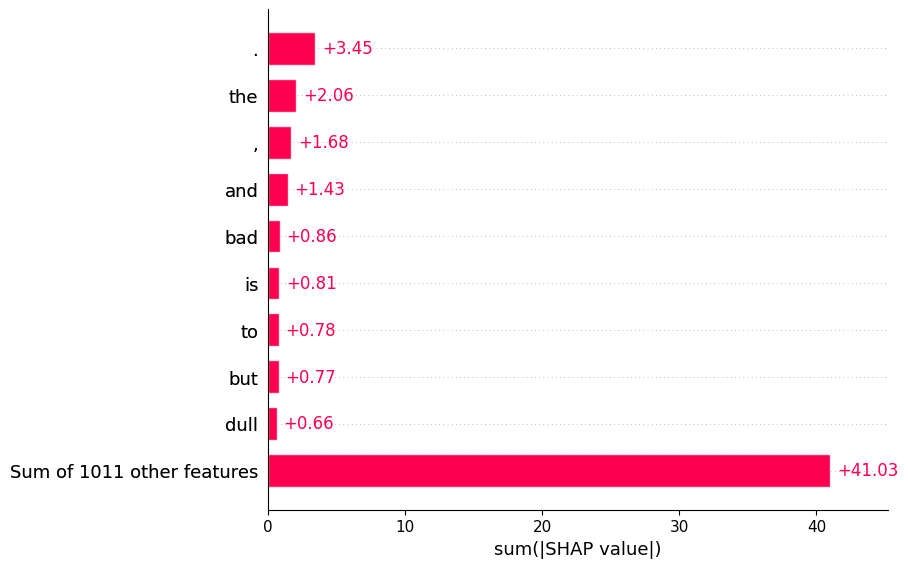

In [ ]:
shap.plots.bar(shap_values.abs.sum(0))

### `shap.plots.bar(shap_values.abs.max(0))`
This bar plot visualizes the maximum SHAP value for each token (feature) across all examples in the dataset, rather than the sum.

`Y-axis`: Tokens or features.

`X-axis`: Maximum SHAP values across all examples.

`Interpretation`:
- This plot highlights the single highest impact that each token had on any prediction.
- It helps identify outliers or extreme cases where certain words had an unusually strong impact on the model's prediction.


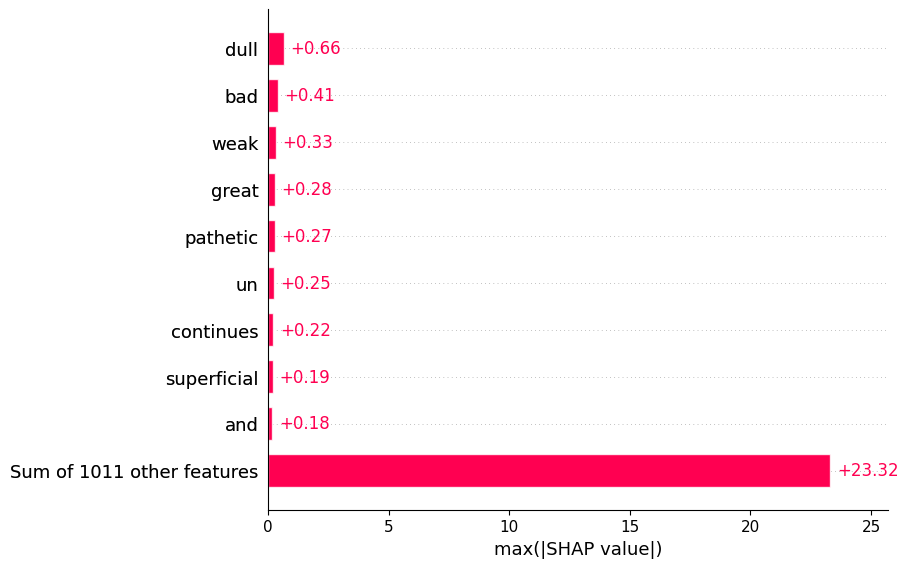

In [ ]:
shap.plots.bar(shap_values.abs.max(0))